# Is Solar the Answer?

This analysis investigates replacement of diesel and petrol with hydrogen for all transport in Australia.
What would this look like if the hydrogen was green and all produced by solar generation?


References:
1. https://www.energy.gov.au/publications/australian-energy-statistics-table-o-electricity-generation-fuel-type-2019-20-and-2020
1. https://www.energy.gov.au/sites/default/files/Australian%20Energy%20Statistics%2C%20Table%20O%20Electricity%20generation%20by%20fuel%20type%202019-20%20and%202020.xlsx
1. https://en.wikipedia.org/wiki/Energy_density
1. https://www.energy.gov.au/sites/default/files/Australian%20Energy%20Statistics%202020%20Energy%20Update%20Report_0.pdf
1. https://www.nrel.gov/docs/fy19osti/73520.pdf
1. https://www.abs.gov.au/statistics/industry/tourism-and-transport/survey-motor-vehicle-use-australia/12-months-ended-30-june-2020/92080DO001_202006.xls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Electricity Generation by Fuel Type

The current electricity generation numbers (GWh) from [energy.gov.au](https://www.energy.gov.au/publications/australian-energy-statistics-table-o-electricity-generation-fuel-type-2019-20-and-2020)
The fuel types are categorised by renewable or non-renewable and the energy generated from each source is shown over time.

In [2]:
df = pd.read_excel('data/Australian Energy Statistics, Table O Electricity generation by fuel type 2019-20 and 2020.xlsx', sheet_name='AUS', header=4)
df = df.drop(index=[0, 1, 7, 8, 9, 17], columns=df.columns[0]).reset_index(drop=True)
df = df.iloc[:12, :]
df = df.rename(columns={'Unnamed: 1': 'fuel'})
df = df.apply(pd.to_numeric, errors='ignore')
df['category'] = np.nan
df.loc[df.index[:5], 'category'] = 'non-renewable' 
df.loc[df.index[5:], 'category'] = 'renewable'
df = pd.pivot_table(df, columns=['category', 'fuel'])
df.index = df.index.str.replace(r'(\d\d).*-(\d\d)', r'\1\2', regex=True)
df_elec_gen = df
df_elec_gen.tail()

category  non-renewable                                                       \
fuel         Black coal    Brown coal   Natural gas   Oil products   Other a   
2016      114294.980000  48795.859000  50536.081000    5655.617000       NaN   
2017      118272.300000  43557.757000  50459.748000    5272.590000       NaN   
2018      121702.311000  36008.406000  53881.672000    4820.875747       NaN   
2019      119844.767916  34459.992520  52775.403406    4922.945279       NaN   
2020      111873.047897  33649.324322  55216.283981    4509.200664       NaN   

category       renewable                                          \
fuel       Bagasse, wood       Biogas   Geothermal         Hydro   
2016         2493.768000  1296.126000        0.215  15318.180000   
2017         2308.007000  1192.539000        0.502  16284.887000   
2018         2264.345000  1253.341000        0.000  16020.789000   
2019         2163.634583  1332.246636        0.000  15967.281111   
2020         1998.086728  1353.543192        0.000  15149.633333   

category                                                            
fuel       Small-scale solar PV          Wind Large-scale solar PV  
2016                6381.049000  12199.498000           457.212000  
2017                7399.259000  12596.985000           672.397000  
2018                8922.359000  15174.425000          1007.582000  
2019               11116.163336  17711.950833          3732.360282  
2020               13897.087569  20395.884546          7136.106674

In [3]:
non_renewable_fuel_types = df_elec_gen.loc[:,('non-renewable')].shape[1]
renewable_fuel_types = df_elec_gen.loc[:,('renewable')].shape[1]

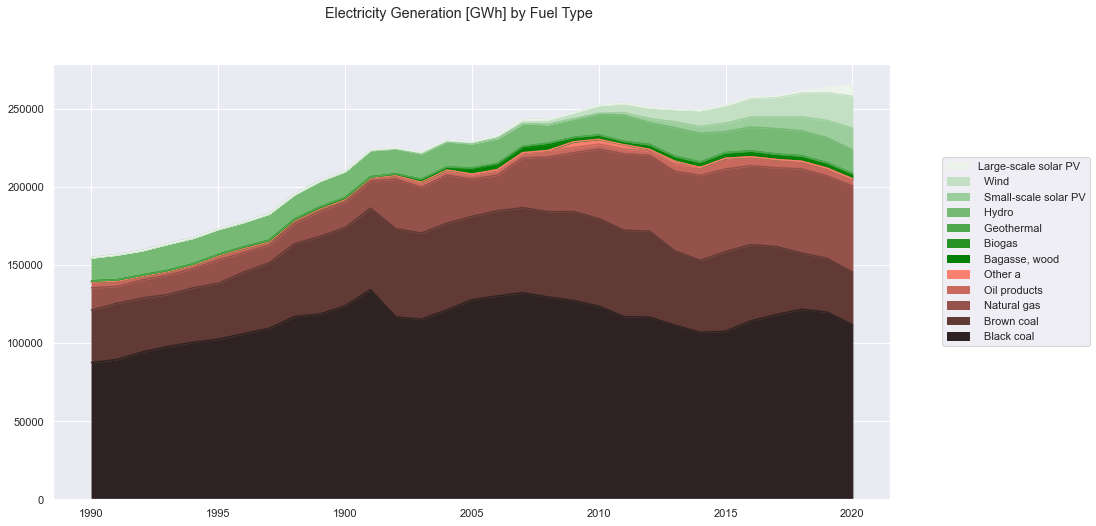

In [4]:
palette_renewable = sns.light_palette("green", renewable_fuel_types).as_hex()[::-1]
palette_non_renewable = sns.dark_palette("salmon", non_renewable_fuel_types).as_hex()
colors = palette_non_renewable + palette_renewable
df_elec_gen.plot.area(figsize=(15,8), color=(colors))
plt.legend(reversed(plt.legend().legendHandles), reversed(df_elec_gen.columns.droplevel()), loc='upper center', bbox_to_anchor=(1.15, 0.8))
plt.suptitle('Electricity Generation [GWh] by Fuel Type')
plt.show()

In [5]:
total_renewable_supply = df_elec_gen.groupby(level='category', axis='columns').sum().loc['2020', ('renewable')]
print(f'Total renewable electrical supply in 2020 is {total_renewable_supply:0.2f} GWh')

Total renewable electrical supply in 2020 is 59930.34 GWh


## Diesel and Petrol Consumption for Transport

Fuel consumption for transport in Australia was taken from [ABS Survey of Motor Vehicle Use, 2020](https://www.abs.gov.au/statistics/industry/tourism-and-transport/survey-motor-vehicle-use-australia/12-months-ended-30-june-2020/92080DO001_202006.xls)

In [6]:
df = pd.read_excel('data/92080DO001_202006.xls', sheet_name='Table_1', header=4)
new_cols = []
for col in df.columns:    
    if pd.isnull(df.loc[0, col]):
        new_cols.append(col)
    else:
        new_cols.append(f'{col}_{df.loc[0, col]}')
df.columns = new_cols
# only keep the total values
df = df.iloc[(df['Unnamed: 0']=='Total').idxmax():, :]
df = df.dropna(how='any', axis='rows')
df = df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns={'Unnamed: 0': 'year'})
df = df.set_index('year', drop=True)
df.head()

,Total kilometres travelled_million,Total kilometres travelled - RSE_%,Number of vehicles_no.,Number of vehicles - RSE_%,Average kilometres travelled_'000,Average kilometres travelled - RSE_%,Fuel consumed_megalitres,Fuel consumed - RSE_%,Rate of fuel consumption_l/100 km,Rate of fuel consumption - RSE_%
year,,,,,,,,,,
2012,232453,2.29,16612038,0.53,14.0,2.25,31839,2.11,13.7,0.92
2014,244369,2.33,17683590,0.67,13.8,2.35,32402,2.22,13.3,0.74
2016,249512,2.09,18191675,0.54,13.7,2.00,32732,1.89,13.1,0.80
2018,255031,1.83,19012770,0.55,13.4,1.82,34170,1.56,13.4,0.91
2020,238499,1.89,19768518,0.50,12.1,1.85,33019,1.70,13.8,0.88


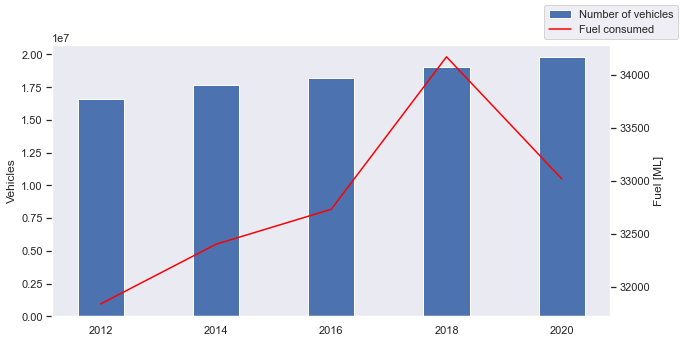

In [7]:
sns.set_theme()
sns.set_style('dark')
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(df.index, df['Number of vehicles_no.'], label='Number of vehicles')
ax1.set_ylabel('Vehicles')
ax2 = ax1.twinx()
ax2.set_ylabel('Fuel [ML]')
ax2.plot(df.index, df['Fuel consumed_megalitres'], color='red', label='Fuel consumed')
ax1.figure.legend()
plt.show()

There was a dip in fuel consumption during 2020, despite an increase in the number of vehicles. This is likely due to reduced travel caused by covid.

In [8]:
df_transport = df
transport_fuel_consumption_ML = df_transport.loc[2020, 'Fuel consumed_megalitres']
print(f'Transport consumed {transport_fuel_consumption_ML} ML of fuel in 2020')

Transport consumed 33019 ML of fuel in 2020


## Specific Energy
A list of [specific energies for chemical reactions](https://en.wikipedia.org/wiki/Energy_density) was found on wikipedia.
When used to produce electricity in a fuel cell or to do work, it is the Gibbs free energy of reaction (ΔG) that sets the theoretical upper limit. For hydrogen, ΔG is 113 MJ/kg if water vapor is produced, and 118 MJ/kg if liquid water is produced. It is assumed that the value of 113 MJ/kg is the relevant value here.

In [9]:
df = pd.DataFrame.from_records([
    {'material': 'hydrogen', 'specific_energy_MJ_kg': 113, 'energy_density_MJ_L': 4.5}, #energy density assumes gas at 69MPa
    {'material': 'diesel', 'specific_energy_MJ_kg': 45.6, 'energy_density_MJ_L': 38.6},
    {'material': 'petrol', 'specific_energy_MJ_kg': 46.4, 'energy_density_MJ_L': 34.2}
])
df = df.set_index('material', drop=True)
df_specific_energy = df
df_specific_energy.head()

,specific_energy_MJ_kg,energy_density_MJ_L
material,,
hydrogen,113.0,4.5
diesel,45.6,38.6
petrol,46.4,34.2


## Energy consumed for transport
Let's simply calculations by assuming that all fuel consumed is Diesel.
We know fuel consumption and energy density, and the Diesel engine has an approximate [efficiency](https://en.wikipedia.org/wiki/Diesel_engine#Efficiency) of `37%`.
What is the actual energy used for work (not wasted as heat etc.)?

In [10]:
diesel_engine_efficiency = 0.37

In [11]:
transport_energy_consumption = df_specific_energy.loc['diesel', 'energy_density_MJ_L'] * transport_fuel_consumption_ML * 1e6
print(f'transport consumed {transport_energy_consumption/1e9:0.2f} PJ of energy')

transport consumed 1274.53 PJ of energy


In [35]:
energy_for_work = transport_energy_consumption * diesel_engine_efficiency
energy_for_work_GWh = energy_for_work * 2.7778e-7
print(f'after allowing for efficiency, transport consumed {energy_for_work/1e9:0.2f} PJ ({energy_for_work_GWh:0.2f} GWh) energy for work')

after allowing for efficiency, transport consumed 471.58 PJ (130994.76 GWh) energy for work


When the energy required for transport is included in with electrical energy produced we see that transport energy is a significant amount of the energy consumed each year. 

**Note** we are comparing the actual energy used as work, not including that energy lost as heat in a combustion engine. This is the actual demand due to transport activity.

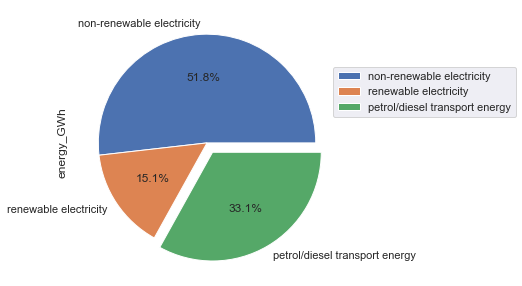

In [48]:
non_renewable_electrical_energy = df_elec_gen.loc['2020',('non-renewable')].sum()
renewable_electrical_energy = df_elec_gen.loc['2020',('renewable')].sum()
df = pd.DataFrame([
    {'source': 'non-renewable electricity', 'energy_GWh': non_renewable_electrical_energy},
    {'source': 'renewable electricity', 'energy_GWh': renewable_electrical_energy},
    {'source': 'petrol/diesel transport energy', 'energy_GWh': energy_for_work_GWh},
     ])
df = df.set_index('source', drop=True)
df.plot.pie(y='energy_GWh', figsize=(5,5), autopct='%1.1f%%', explode=(0,0,0.1))
df_electrical_transport_energy = df
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8))
plt.show()

## Hydrogen Round Trip Efficiency
There are significant losses in process of using electricity to generate hydrogen through electrolysis, compressing the hydrogen for storage, then using a fuel cell to generate electricity from the hydrogen. These losses are captured in the 'round trip efficiency'. The value for [round trip efficiency for hydrogen](https://www.nrel.gov/docs/fy19osti/73520.pdf) obtained was `35%`

In [36]:
h2_round_trip_effic = 0.35

## Hydrogen Equivalent
The amount of energy required to deliver similar useful energy for work allowing for losses in a hydrogen storage / fuel cell mechanism.
What ratio is this of current renewable generation capacity?

In [37]:
hydrogen_energy_demand = energy_for_work / h2_round_trip_effic

In [38]:
hydrogen_energy_demand_GWh =  hydrogen_energy_demand / 3.6e6
print(f'Electrical energy required for hydrogen: {hydrogen_energy_demand_GWh:0.2f} GWh')

Electrical energy required for hydrogen: 374267.74 GWh


In [39]:
hydrogen_energy_demand_renewables_ratio = hydrogen_energy_demand_GWh / total_renewable_supply
print(f'Hydrogen required {hydrogen_energy_demand_renewables_ratio:0.2f} times the current renewable supply')

Hydrogen required 6.25 times the current renewable supply


## Area Required for Solar Farms to Meet Demand
[Wikipedia list of PV power stations](https://en.wikipedia.org/wiki/List_of_photovoltaic_power_stations) gives some characteristics to use for determining the size of installation required.

In [40]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_photovoltaic_power_stations')[1]
df_solar_farms = df
df.head()

,Name,Country,Location,CapacityMWDC or MWAC (*),Annual Output(GWh),LandSize(km2),Year,Remarks,Ref
0,Bhadla Solar Park,India,".mw-parser-output .geo-default,.mw-parser-outp...",2700,NaN,160,2018,"First farms commisioned in 2018, more farms ar...",[13][14][15] [16]
1,Longyangxia Dam Solar Park,China,36°10′54″N 100°34′41″E﻿ / ﻿36.18167°N 100.57806°E,2400,NaN,NaN,2015,"320 MW Phase I Completed in December 2013, 530...",[17][18][19][20][16]
2,Huanghe Hydropower Hainan Solar Park,China,36°02′25″N 100°20′40″E﻿ / ﻿36.04028°N 100.34444°E,"2,200*",NaN,50,2020,"Built in five phases, it consists of 672 PV ar...",[21][22]
3,Pavagada Solar Park,India,14°16′9″N 77°24′50″E﻿ / ﻿14.26917°N 77.41389°E,2050,NaN,53,2019,In Karnataka state,[23][24]
4,Benban Solar Park,Egypt,24°27′21.6″N 32°44′20.4″E﻿ / ﻿24.456000°N 32.7...,1650,NaN,37,2019,In Aswan,[25]


In [41]:
df = df.apply(pd.to_numeric, errors='coerce')
biggest_solar_km2 = df['LandSize(km2)'].max()
df = df.dropna(subset=['Annual Output(GWh)', 'LandSize(km2)'])
df['GWh_km2'] = df['Annual Output(GWh)'] / df['LandSize(km2)']
gwh_km2 = df['GWh_km2'].mean()
print(f'Solar farms provide on average {gwh_km2:0.2f} GWh/km2 per year')

Solar farms provide on average 91.92 GWh/km2 per year


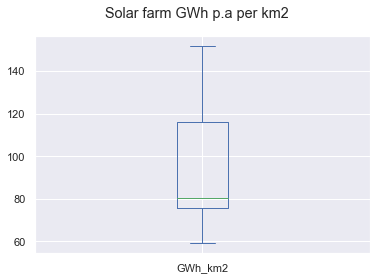

In [42]:
sns.set_theme()
df['GWh_km2'].plot.box()
plt.suptitle('Solar farm GWh p.a per km2')
plt.show()

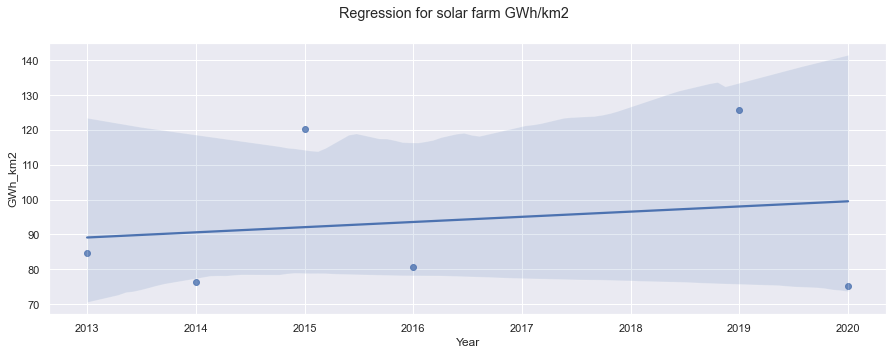

In [43]:
df = df.groupby('Year').mean()
fig,ax = plt.subplots(figsize=(15,5))
sns.regplot(x=df.index, y=df['GWh_km2'])
plt.suptitle('Regression for solar farm GWh/km2')
plt.show()

In [44]:
km2_required = hydrogen_energy_demand_GWh / gwh_km2
print(f'{km2_required:0.2f} km2 of solar farm is required to produce green hydrogen to meet transport demands.')
print(f'This is an area {km2_required/biggest_solar_km2:0.2f}x the biggest solar farm in production to date.')

4071.88 km2 of solar farm is required to produce green hydrogen to meet transport demands.
This is an area 25.45x the biggest solar farm in production to date.


In [45]:
area_of_australia_km2 = 7656127
ratio_solar_australia = km2_required / area_of_australia_km2
print(f'Solar required is {ratio_solar_australia*100:0.2f}% of Australia mainland')

Solar required is 0.05% of Australia mainland
